In [54]:

import pandas as pd
import numpy as np
from collections import Counter
import time
import matplotlib.pyplot as plt

print("problem 1 output")
 # Problem - 1: Perform a classification task with knn from scratch.

''' 1. Load the Dataset:
• Read the dataset into a pandas DataFrame.'''
df = pd.read_csv('/content/drive/MyDrive/AI/diabetes_.csv')

'''• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).'''
print("First few rows of the dataset: ")
print(df.head())
print("\n")

# a. Data types checking
print("Data Types:")
print(df.dtypes)
print("\n")

# b.  Dissing values checking
print("Missing Values: ")
print(df.isnull().sum())
print("\n")

# c. Summary statistics
print("Summary Statistics: ")
print(df.describe())
print("\n")



''' 2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.'''


print("Adding missing values")
missing_values = df.isnull().sum()
print(missing_values)
print(missing_values.sum())

if missing_values.sum() == 0:
    print("\n✓ No actual missing values (NaN) found in the dataset.")
else:
    print(f"\nFound {missing_values.sum()} missing values. Handling them...")

print("\n")


print("")
'''3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).'''
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Feature Engineering")
print(f"Feature matrix X shape: {X.shape}")
print(f"Target variable y shape: {y.shape}")
print("\n")

# • Perform a train - test split from scratch using a 70% − 30% ratio.
data_shuffled = pd.concat([X, y], axis=1).sample(frac=1, random_state=42).reset_index(drop=True)

# Separate X and y from the shuffled data
X_shuffled = data_shuffled.drop('Outcome', axis=1)
y_shuffled = data_shuffled['Outcome']

# Calculate the split index for 70% train data
train_ratio = 0.7
split_index = int(len(data_shuffled) * train_ratio)

# Perform the train-test split by slicing the shuffled data
X_train = X_shuffled.iloc[:split_index]
X_test = X_shuffled.iloc[split_index:]
y_train = y_shuffled.iloc[:split_index]
y_test = y_shuffled.iloc[split_index:]


'''4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.'''

# Convert data to numpy arrays for computation
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values

# Function for Euclidean Distance
def euclidean_distance(point1, point2):
    """Computes the Euclidean distance between two N-dimensional points."""
    return np.sqrt(np.sum((point1 - point2)**2))

# Function for Predicting the class for a single query
def predict_single_query(X_train, y_train, query_point, k):
    """
    Predicts the class label for a single query point using KNN.
    """
    distances = []

    # Calculate distance from query_point to every point in X_train
    for i, train_point in enumerate(X_train):
        dist = euclidean_distance(query_point, train_point)
        distances.append((dist, y_train[i])) # Store (distance, label)

    # Sort distances by distance (ascending)
    distances.sort(key=lambda x: x[0])

    # Get the labels of the K nearest neighbors
    neighbors_labels = [label for dist, label in distances[:k]]

    # Perform majority vote
    most_common = Counter(neighbors_labels).most_common(1)

    # Return the most common label
    return most_common[0][0]

# Function for Predicting classes for all test samples
def predict_test_samples(X_train, y_train, X_test, k):
    """Predicts the class labels for all points in the test set."""
    predictions = []

    for query_point in X_test:
        prediction = predict_single_query(X_train, y_train, query_point, k)
        predictions.append(prediction)

    return np.array(predictions)

# Function to Evaluate Performance using Accuracy
def calculate_accuracy(y_true, y_pred):
    """Computes the classification accuracy."""
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    return correct_predictions / total_samples

# --- Execute KNN ---
K = 5
y_pred = predict_test_samples(X_train_np, y_train_np, X_test_np, K)
accuracy = calculate_accuracy(y_test_np, y_pred)

print(" KNN Implementation Results: ")
print(f"K value used: {K}")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Correct predictions: {np.sum(y_test_np == y_pred)} out of {len(y_test_np)}")

print("\n")


print("problem 2 output")

#  Problem - 2 - Experimentation:

'''1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results'''


def euclidean_distance(point1, point2):
    """Computes the Euclidean distance between two N-dimensional points."""
    return np.sqrt(np.sum((point1 - point2)**2))

def predict_single_query(X_train, y_train, query_point, k):
    """Predicts the class label for a single query point using KNN."""
    distances = []

    # 1. Calculate distances
    for i, train_point in enumerate(X_train):
        dist = euclidean_distance(query_point, train_point)
        distances.append((dist, y_train[i]))

    # 2. Sort and find K neighbors
    distances.sort(key=lambda x: x[0])
    neighbors_labels = [label for dist, label in distances[:k]]

    # 3. Majority vote
    most_common = Counter(neighbors_labels).most_common(1)
    return most_common[0][0]

def predict_test_samples(X_train, y_train, X_test, k):
    """Predicts the class labels for all points in the test set."""
    predictions = []

    for query_point in X_test:
        prediction = predict_single_query(X_train, y_train, query_point, k)
        predictions.append(prediction)

    return np.array(predictions)

def calculate_accuracy(y_true, y_pred):
    """Computes the classification accuracy."""
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    return correct_predictions / total_samples

# Convert the existing Pandas variables into NumPy arrays
X_train_unscaled = X_train.values
y_train_np = y_train.values
X_test_unscaled = X_test.values
y_test_np = y_test.values


# 1. Scale the Feature matrix X (Standardization from scratch)

# Calculate mean and standard deviation ONLY from the training data
mean_train = np.mean(X_train_unscaled, axis=0)
std_train = np.std(X_train_unscaled, axis=0)

# Handle potential division by zero
std_train[std_train == 0] = 1e-8

# Scale X_train and X_test using the train statistics
X_train_scaled = (X_train_unscaled - mean_train) / std_train
X_test_scaled = (X_test_unscaled - mean_train) / std_train


# 2. Use the scaled data for training and testing the kNN Classifier.
K = 5 # Use K=5

# Predict on the scaled test set
y_pred_scaled = predict_test_samples(X_train_scaled, y_train_np, X_test_scaled, K)

# 3. Record the results (Evaluate performance)
accuracy_scaled = calculate_accuracy(y_test_np, y_pred_scaled)

print(f"\nResults for Scaled KNN (K={K})")
print(f"Accuracy: {accuracy_scaled:.4f}")
print(f"Total Test Samples: {len(y_test_np)}")

print("\n")




problem 1 output
First few rows of the dataset: 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction

problem 3 output
1 0.6796536796536796 0.70995670995671 0.9387176036834717 0.982219934463501


2 0.6796536796536796 0.70995670995671 0.9880120754241943 0.9464998245239258


3 0.7186147186147186 0.7662337662337663 1.2320609092712402 1.6497130393981934


4 0.7142857142857143 0.7705627705627706 1.6709823608398438 1.0622689723968506


5 0.7272727272727273 0.7532467532467533 0.9355580806732178 0.922621488571167


6 0.7229437229437229 0.7489177489177489 0.9817440509796143 0.9291505813598633


7 0.7316017316017316 0.7662337662337663 0.9390201568603516 0.9461855888366699


8 0.7142857142857143 0.7662337662337663 0.9622693061828613 0.9447135925292969


9 0.7489177489177489 0.7489177489177489 0.9380714893341064 1.1080129146575928


10 0.7402597402597403 0.7662337662337663 1.6289997100830078 1.6561570167541504


11 0.7402597402597403 0.7619047619047619 1.1478970050811768 0.9351806640625


12 0.7619047619047619 0.7705627705627706 0.9457693099975586 0.940737247467041


13 0.7532467532467533 0.783549

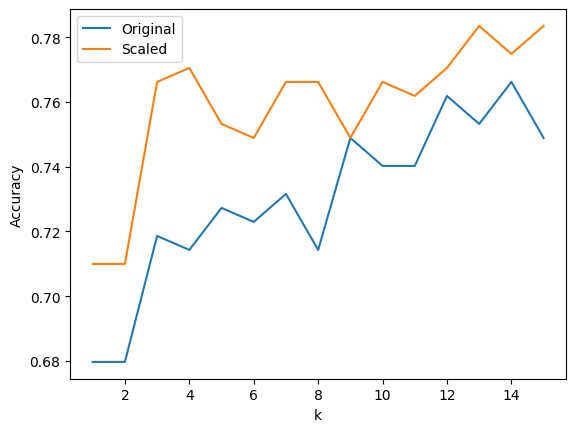

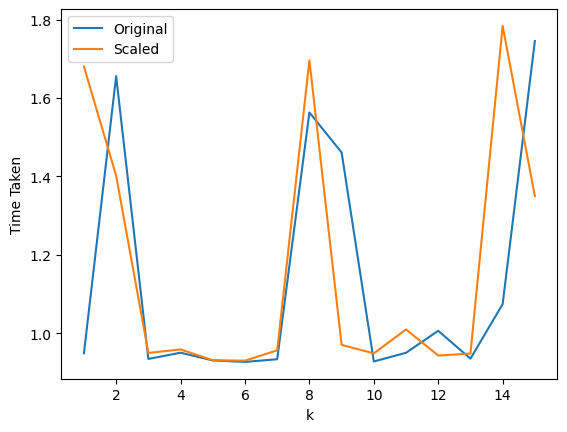

In [52]:
'''Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:
k= 1, 2, 3, . . . 15
• For each k, record:
– Accuracy.
– Time taken to make predictions'''

# First, recreate the train-test split
print("problem 3 output")
total_samples = len(X)
train_size = int(0.7 * total_samples)
train_indices = list(range(train_size))
test_indices = list(range(train_size, total_samples))

# Scale the data
X_scaled = X.copy()
for column in X.columns:
    min_val = X[column].min()
    max_val = X[column].max()
    X_scaled[column] = (X[column] - min_val) / (max_val - min_val)

# Split original data
X_train = X.iloc[train_indices]
X_test = X.iloc[test_indices]
y_train = y.iloc[train_indices]
y_test = y.iloc[test_indices]

# Split scaled data
X_train_scaled = X_scaled.iloc[train_indices]
X_test_scaled = X_scaled.iloc[test_indices]

# Convert to numpy arrays
X_train_np = X_train.values
X_test_np = X_test.values
X_train_scaled_np = X_train_scaled.values
X_test_scaled_np = X_test_scaled.values
y_train_np = y_train.values
y_test_np = y_test.values

# Run KNN for different k values
k_values =(range(1,16))

for k in k_values:
    # Original dataset
    start = time.time()
    y_pred_orig = predict_test_samples(X_train_np, y_train_np, X_test_np, k)
    time_orig = time.time() - start
    acc_orig = calculate_accuracy(y_test_np, y_pred_orig)

    # Scaled dataset
    start = time.time()
    y_pred_scaled = predict_test_samples(X_train_scaled_np, y_train_np, X_test_scaled_np, k)
    time_scaled = time.time() - start
    acc_scaled = calculate_accuracy(y_test_np, y_pred_scaled)

    print(k, acc_orig, acc_scaled, time_orig, time_scaled)

    print("\n")

print("proble 3 , question2 output")
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
results = []

for k in k_values:
    # Original dataset
    start = time.time()
    y_pred_orig = predict_test_samples(X_train_np, y_train_np, X_test_np, k)
    time_orig = time.time() - start
    acc_orig = calculate_accuracy(y_test_np, y_pred_orig)

    # Scaled dataset
    start = time.time()
    y_pred_scaled = predict_test_samples(X_train_scaled_np, y_train_np, X_test_scaled_np, k)
    time_scaled = time.time() - start
    acc_scaled = calculate_accuracy(y_test_np, y_pred_scaled)

    results.append((k, acc_orig, acc_scaled, time_orig, time_scaled))

# Plot k vs. Accuracy
plt.plot(k_values, [r[1] for r in results], label='Original')
plt.plot(k_values, [r[2] for r in results], label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot k vs. Time Taken
plt.plot(k_values, [r[3] for r in results], label='Original')
plt.plot(k_values, [r[4] for r in results], label='Scaled')
plt.xlabel('k')
plt.ylabel('Time Taken')
plt.legend()
plt.show()